# Survey Properties Maps correlations

<img align="left" src = ../figs/logos/logo-IJCLab_v1.png height=40, style="padding: 10px"> 
<b>Correlations of Survey Properties Maps </b> <br>
Last verified to run on 2022-09-04 with LSST Science Pipelines release w_2022_22 <br>
Contact authors: Sylvie Dagoret-Campagne (DP0 Delegate) <br>
Target audience: DP0 delegates member <br>

## import packages

In [1]:
# general python packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize

# packages for working with sparse healpix maps
import healsparse as hsp
import skyproj

# LSST packages
from lsst.daf.butler import Butler
import lsst.geom as geom

# allow interactive plots
#%matplotlib widget
%matplotlib inline

# default plot style is accessible
plt.style.use('tableau-colorblind10')

In [2]:
from scipy.stats import pearsonr, spearmanr

In [3]:
all_bands = ['u','g','r','i','z','y']

## Butler

In [4]:
config = 'dp02'
collections = '2.2i/runs/DP0.2'
butler = Butler(config, collections=collections)
registry=butler.registry

## Read SPM

In [5]:
# No consolidated map
all_map_names = []
for dtype in sorted(butler.registry.queryDatasetTypes(expression="*map*")):
    if "deepCoadd" in dtype.name and "consolidated_map" in  dtype.name :
        all_map_names.append(dtype.name)
print("All SPM in deepCoadd consolidated_maps")
all_map_names

All SPM in deepCoadd consolidated_maps


['deepCoadd_dcr_ddec_consolidated_map_weighted_mean',
 'deepCoadd_dcr_dra_consolidated_map_weighted_mean',
 'deepCoadd_dcr_e1_consolidated_map_weighted_mean',
 'deepCoadd_dcr_e2_consolidated_map_weighted_mean',
 'deepCoadd_exposure_time_consolidated_map_sum',
 'deepCoadd_psf_e1_consolidated_map_weighted_mean',
 'deepCoadd_psf_e2_consolidated_map_weighted_mean',
 'deepCoadd_psf_maglim_consolidated_map_weighted_mean',
 'deepCoadd_psf_size_consolidated_map_weighted_mean',
 'deepCoadd_sky_background_consolidated_map_weighted_mean',
 'deepCoadd_sky_noise_consolidated_map_weighted_mean']

## Select maps

In [6]:
NMAP = len(all_map_names)
for idx, value in enumerate(all_map_names):
    print(f" {idx} :: {value}")


 0 :: deepCoadd_dcr_ddec_consolidated_map_weighted_mean
 1 :: deepCoadd_dcr_dra_consolidated_map_weighted_mean
 2 :: deepCoadd_dcr_e1_consolidated_map_weighted_mean
 3 :: deepCoadd_dcr_e2_consolidated_map_weighted_mean
 4 :: deepCoadd_exposure_time_consolidated_map_sum
 5 :: deepCoadd_psf_e1_consolidated_map_weighted_mean
 6 :: deepCoadd_psf_e2_consolidated_map_weighted_mean
 7 :: deepCoadd_psf_maglim_consolidated_map_weighted_mean
 8 :: deepCoadd_psf_size_consolidated_map_weighted_mean
 9 :: deepCoadd_sky_background_consolidated_map_weighted_mean
 10 :: deepCoadd_sky_noise_consolidated_map_weighted_mean


In [7]:
# time vs maglim
idx_map1 = 7
idx_map2 = 4

# e2 vs e1
idx_map1 = 2
idx_map2 = 3

# e2 vs e1
idx_map1 = 5
idx_map2 = 6

# sky back
idx_map1 = 9
idx_map2 = 10

idx_band = 3

In [8]:
name_spm1 = all_map_names[idx_map1]
name_spm2 = all_map_names[idx_map2]
band_sel = all_bands[idx_band]

In [9]:
band_sel = all_bands[idx_band]

### read the HSP maps

In [10]:
hspmap1 = butler.get(name_spm1, band=band_sel)
hspmap2 = butler.get(name_spm2, band=band_sel) 

## retrieve pixels of maps

In [11]:
valid_pixels_indices1 = hspmap1.valid_pixels
valid_pixels_indices2 = hspmap2.valid_pixels

In [12]:
common_pixels_indices = np.intersect1d(valid_pixels_indices1 , valid_pixels_indices2 )

In [13]:
#missing_pixels_indices1_flag = ~np.isin(valid_pixels_indices1,common_pixels_indices)  

In [14]:
#missing_pixels_indices2_flag = ~np.isin(valid_pixels_indices2,common_pixels_indices)  

In [15]:
X = hspmap1[common_pixels_indices] 
Y = hspmap2[common_pixels_indices] 

In [16]:
# pearson correlation coefficient
rp = pearsonr(X,Y)

In [17]:
textstr = '\n'.join((
    r'$r_p=%.2f$' % (rp[0], ),
    ))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

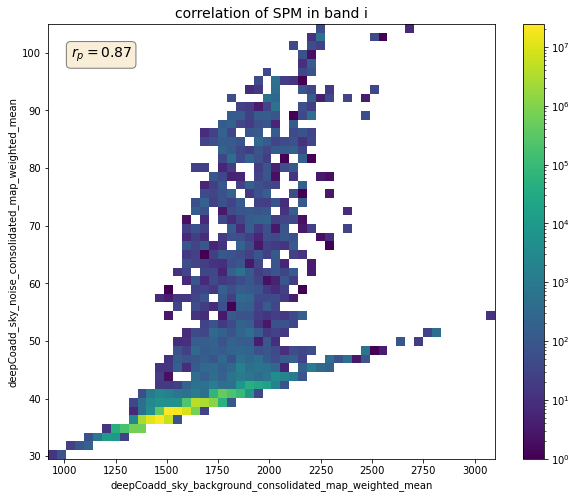

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
h=ax.hist2d(X,Y,bins=50,norm=mpl.colors.LogNorm());
fig.colorbar(h[3], ax=ax)
ax.set_xlabel(name_spm1)
ax.set_ylabel(name_spm2)
title = f"correlation of SPM in band {band_sel}"
ax.set_title(title,fontsize=14)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
figname = "corr_"+name_spm1+"_"+name_spm2+".png"
plt.savefig(figname)
plt.show
del h
del fig

In [19]:
# Kill the kernel
#spearmanr(X,Y)